In [2]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from io import StringIO

In [3]:
data = '''Year,GDP,Comments
1960,22502.07323,Monitoring starts
1961,24373.1344,
1962,21559.88869,
1963,21251.2838,
1964,21852.94983,
1965,20764.88062,
1966,22915.76925,GE factory announced
1967,22849.08189,
1968,20678.59664,
1969,19968.81867,
1970,20996.58641,GE factory begins production
1971,20069.35074,
1972,21305.3446,
1973,22273.72443,
1974,20609.11441,Major reforms
1975,34249.0254,
1976,30446.18476,Earthquake
1977,32746.27686,
1978,31260.83283,
1979,31592.91967,
1980,33664.82711,
1981,34465.70566,
1982,31547.5842,
1983,31040.83076,King dies. Queen takes over
1984,32454.99396,
1985,32315.37201,
1986,32925.89118,Queen abdicates
1987,30915.35428,
1988,32766.5371,Oil discovered
1989,31892.96525,
1990,32067.53038,
1991,34672.40845,First oil well starts
1992,26937.38241,
1993,26667.04898,War begins
1994,28396.70096,
1995,24656.58583,War ends
1996,26950.02214,
1997,25107.10105,
1998,24689.07414,
1999,25288.9578,
2000,25798.6625,
2001,26162.31163,
2002,25749.00059,
2003,26772.9731,
2004,25919.32523,
2005,28636.76493,
2006,27365.40318,
2007,24815.98308,
2008,25846.89922,
2009,25071.8944,
2010,25585.2424,Monitoring ends'''

df = pd.read_csv(StringIO(data))


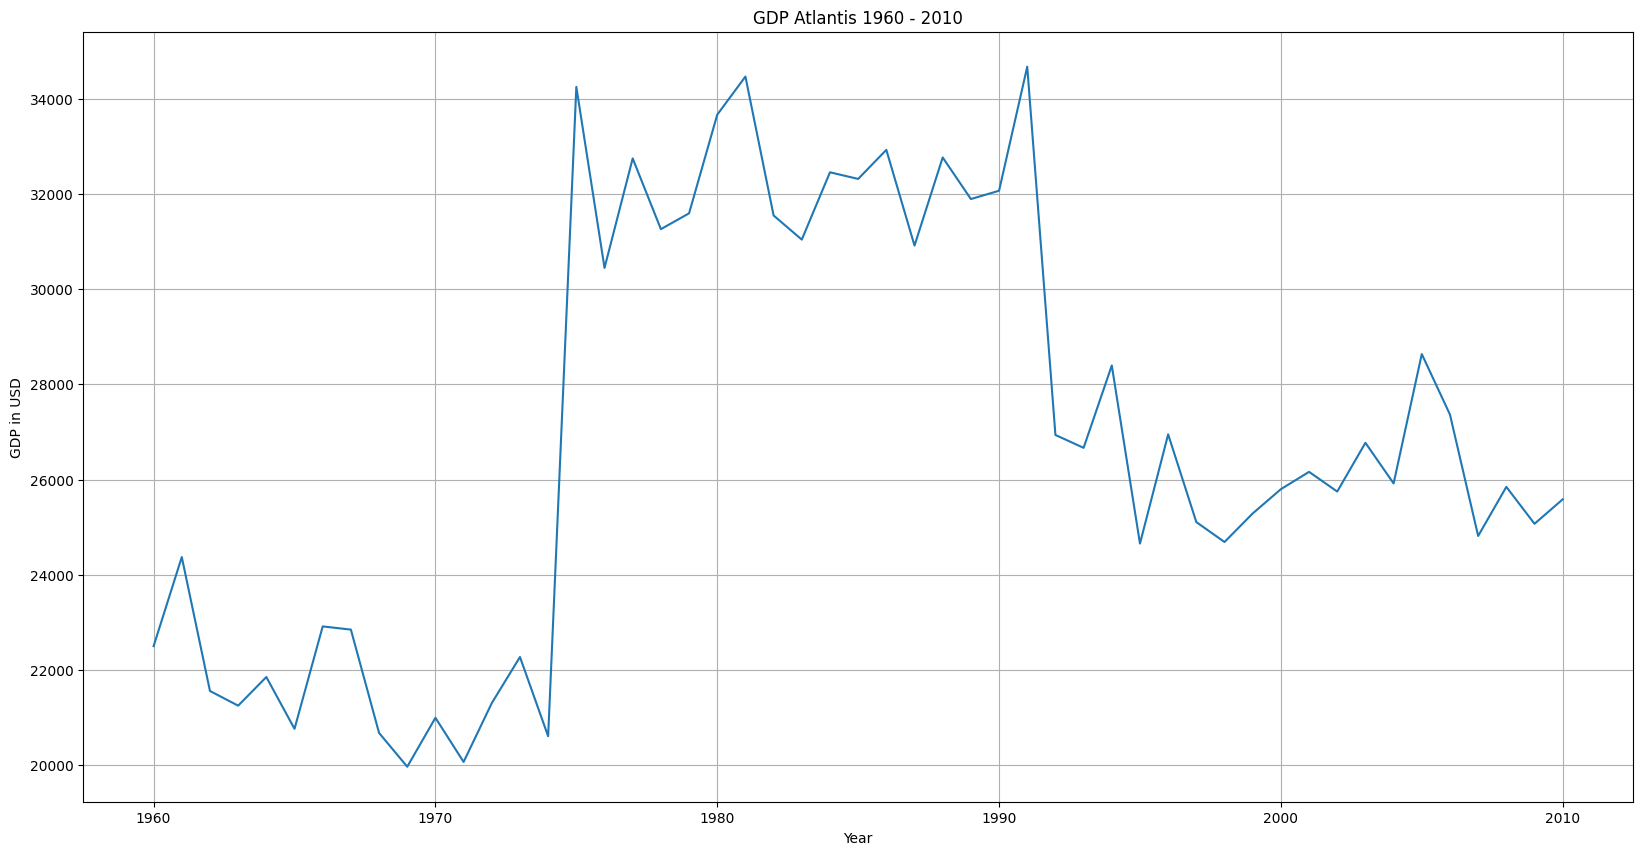

In [4]:
plt.figure(figsize=(20, 10))
plt.plot(df['Year'], df['GDP'])
plt.xlabel('Year')
plt.ylabel('GDP in USD')
plt.title('GDP Atlantis 1960 - 2010')
plt.grid()
plt.show()

    Year  GDP_growth                      Comments
0   1960         NaN             Monitoring starts
6   1966   10.358300          GE factory announced
10  1970    5.146863  GE factory begins production
14  1974   -7.473425                 Major reforms
16  1976  -11.103500                    Earthquake
23  1983   -1.606315   King dies. Queen takes over
26  1986    1.889253               Queen abdicates
28  1988    5.987908                Oil discovered
31  1991    8.123102         First oil well starts
33  1993   -1.003562                    War begins
35  1995  -13.170949                      War ends
50  2010    2.047504               Monitoring ends


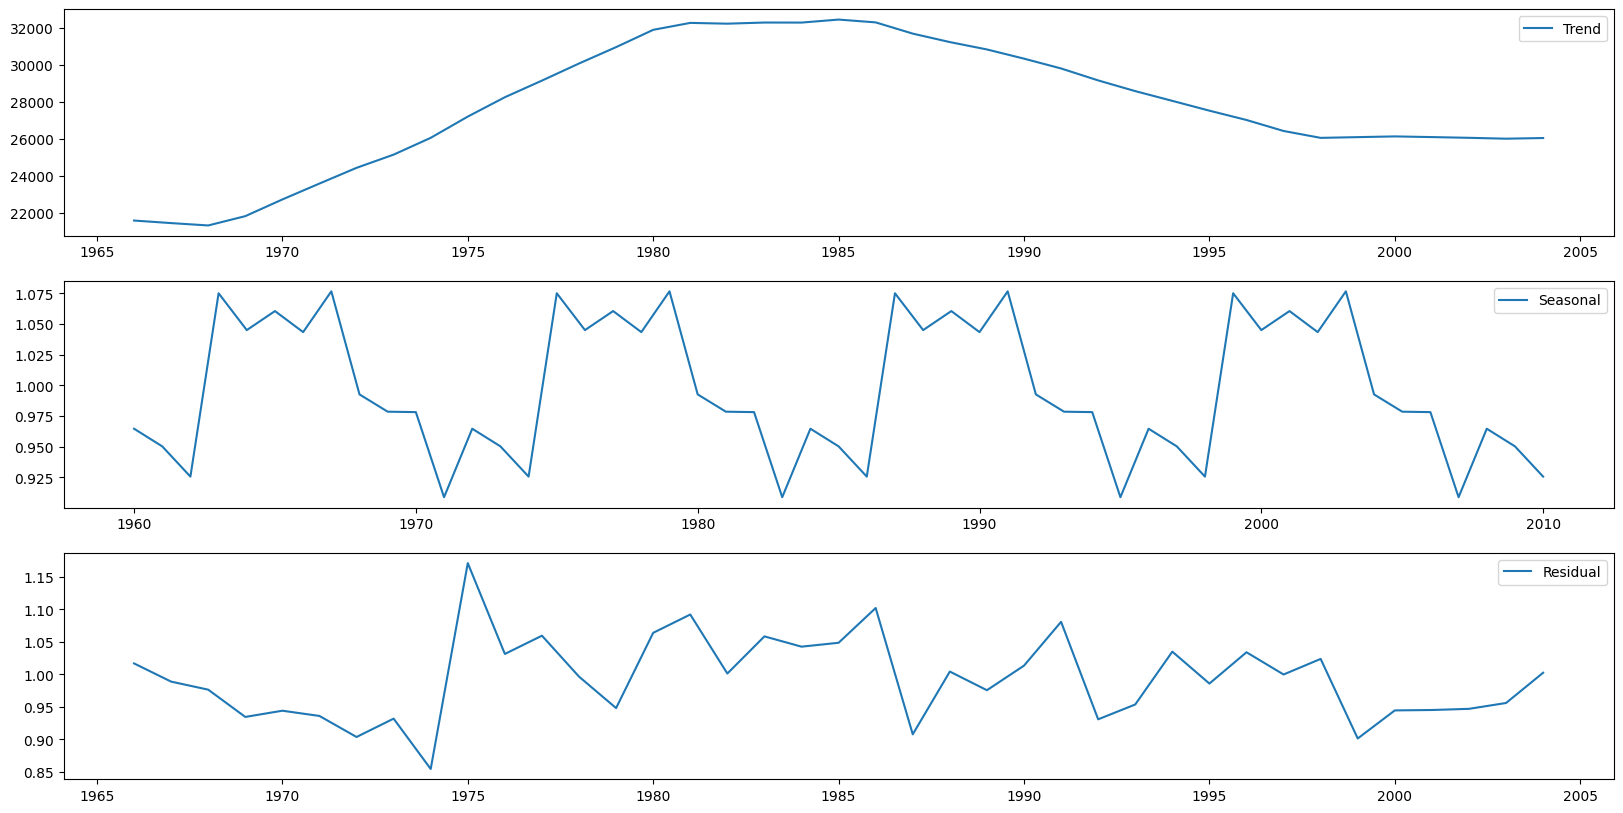

In [21]:
df['GDP_growth'] = df['GDP'].pct_change() * 100

events_df = df[df['Comments'].notnull()].copy()
print(events_df[['Year', 'GDP_growth', 'Comments']])


decomposition = seasonal_decompose(df['GDP'], model='multiplicative', period=12)

plt.figure(figsize=(20, 10))
plt.subplot(311)
plt.plot(df['Year'], decomposition.trend, label='Trend')
plt.legend()
plt.subplot(312)
plt.plot(df['Year'], decomposition.seasonal, label='Seasonal')
plt.legend()
plt.subplot(313)
plt.plot(df['Year'], decomposition.resid, label='Residual')
plt.legend()
plt.show()


1966 - Short term impact, GE factory announced. Slight increase

1970 - Short term impact, GE factory production begins. A very slight increase that year, could be irrelevant to the factory itself. 

1974 - Major long lasting impact, Major reforms. Positive impact with a huge increase the next year

1976 - Short term impact, Earthquake. A slight negative impact, possibly early in the year so it's visible in the same year

1988 - Not instant impact, majort impact later when oil started flowin. 1991 

oil starts flowing. One would think it would be a positive impact to find oil --> It wasn't 

1993 - Short term impact, war starts. The year after got an increase, probably caused by war time production.

1995 - short term impact, war ends. Same year the war ends it dips a little bit, probably caused by the cease of war time production, rises the next year again


A trend that has it's peak from the 80s to about 90s and then starts to fall off. Not to the same low as before tho so there still is an increase from 1965 to 2005